Sebelumnya import library-library yang diperlukan terdahulu

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [ ]:
#Import data dari google drive kita, jadi diinisiasi dulu setupnya sebaga berikut
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Google Drive akan dihubungkan ke sesi Colab pada direktori yang ditentukan (dalam contoh ini, di dalam direktori /content/drive). Ini memungkinkan untuk mengakses file yang ada di Google Drive langsung dari notebook Colab.

## Data Understanding

In [ ]:
# Load data from Excel file

file_path = "/content/drive/MyDrive/Kalbe/Ilapak 12 (September-November).xlsx" #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

data = pd.read_excel(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

data.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,id,times,Shift,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC)
0,99943,2023-09-01 06:29:25,0,0,0.0,0.0,0.0,0.0
1,99944,2023-09-01 06:31:14,3,1,43.1,38.2,50.8,53.6
2,99945,2023-09-01 06:36:14,3,1,91.5,91.6,144.7,150.5
3,99946,2023-09-01 06:41:14,3,1,132.3,129.5,208.0,212.2
4,99947,2023-09-01 06:46:14,1,1,164.0,158.2,229.8,229.7


In [ ]:
data['times'] = pd.to_datetime(data['times']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
def overview(data: pd.DataFrame, timestamp_col: str = None) -> None:
    print('Null Count:\n', data.isnull().sum(),'\n')
    print('Data Types:\n', data.dtypes)

    if timestamp_col is not None:
        print('\nDate Range:\n\nStart:\t',data[timestamp_col].min())
        print('End:\t',data[timestamp_col].max())
        print('Days:\t',(data[timestamp_col].max() - data[timestamp_col].min()))

In [ ]:
overview(data, timestamp_col='times')

Null Count:
 id                                            0
times                                         0
Shift                                         0
Status                                        0
Suhu Sealing Vertikal Bawah (oC)              0
Suhu Sealing Vertical Atas (oC)               0
Suhu Sealing Horizontal Depan/Kanan (oC)      0
Suhu Sealing Horizontal Belakang/Kiri (oC)    0
dtype: int64 

Data Types:
 id                                                     int64
times                                         datetime64[ns]
Shift                                                  int64
Status                                                 int64
Suhu Sealing Vertikal Bawah (oC)                     float64
Suhu Sealing Vertical Atas (oC)                      float64
Suhu Sealing Horizontal Depan/Kanan (oC)             float64
Suhu Sealing Horizontal Belakang/Kiri (oC)           float64
dtype: object

Date Range:

Start:	 2023-09-01 06:29:25
End:	 2023-11-29 07:58:19
Days:

Fungsi overview digunakan untuk memberikan gambaran umum tentang DataFrame, termasuk informasi tentang missing values, tipe data, dan jika kolom timestamp diberikan, juga rentang tanggal.

Bisa dilihat dari data Output diatas, Bahwa di dalam dataset tersebut Memiliki 3 jenis Data Type (dtypes: float64(4), int64(1), datetime64[ns])

* times = datetime64[ns]
* Shift = int64
* Suhu Sealing Vertikal Bawah = float64
* Suhu Sealing Vertical Atas= float64
* Suhu Sealing Horizontal Depan/Kanan = float64
* Suhu Sealing Horizontal Belakang/Kiri = float64

**Drop Unnecessary Columns/Rows**

In [ ]:
# Select relevant columns and rename them
df = data[['times','Suhu Sealing Vertikal Bawah (oC)', 'Suhu Sealing Vertical Atas (oC)']].rename(columns={'Suhu Sealing Vertikal Bawah (oC)': 'suhu_sealing_vertical_bawah', 'times': 'datetime', 'Suhu Sealing Vertical Atas (oC)': 'suhu_sealing_vertical_atas'})

In [ ]:
df.head()

,datetime,suhu_sealing_vertical_bawah,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,0.0,0.0
1,2023-09-01 06:31:14,43.1,38.2
2,2023-09-01 06:36:14,91.5,91.6
3,2023-09-01 06:41:14,132.3,129.5
4,2023-09-01 06:46:14,164.0,158.2


Kode ini memilih kolom-kolom tertentu dari DataFrame data, yaitu 'times', 'Suhu Sealing Vertikal Bawah (oC)', dan 'Suhu Sealing Vertikal Bawah (oC)', kemudian mengganti nama kolom-kolom tersebut. Hasilnya disimpan dalam variabel df.

Kolom 'Suhu Sealing Vertikal Bawah (oC)' diubah namanya menjadi 'suhu_sealing_vertical_bawah', kolom 'Suhu Sealing Vertikal Bawah (oC)' diubah menjadi kolom 'suhu_sealing_vertical_atas', dan 'times' diubah namanya menjadi 'datetime'. Hasilnya adalah DataFrame baru yang hanya berisi tiga kolom dengan nama yang telah diubah.

Variabel df sekarang berisi DataFrame yang hanya memiliki dua kolom yang dipilih dari data dan nama kolomnya telah diubah sesuai dengan instruksi dalam metode rename().

In [ ]:
print("Rows and Columns = ", df.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 3)


**Deskripsi Statistik**

In [ ]:
df.head()

,datetime,suhu_sealing_vertical_bawah,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,0.0,0.0
1,2023-09-01 06:31:14,43.1,38.2
2,2023-09-01 06:36:14,91.5,91.6
3,2023-09-01 06:41:14,132.3,129.5
4,2023-09-01 06:46:14,164.0,158.2


In [ ]:
df.dtypes

datetime                       datetime64[ns]
suhu_sealing_vertical_bawah           float64
suhu_sealing_vertical_atas            float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
suhu_sealing_vertical_bawah,7622.0,222.565783,45.036489,0.0,234.2,234.4,239.0,243.0
suhu_sealing_vertical_atas,7622.0,218.052125,67.948703,-2313.1,229.2,229.4,234.2,245.7


Ini menggunakan metode describe() pada DataFrame untuk menghasilkan ringkasan statistik dari kolom-kolom numerik. T berarti melakukan tranposisi, sehingga ringkasan statistik ditransposisikan agar lebih mudah dibaca. Metode describe() memberikan informasi seperti mean (rata-rata), std (standar deviasi), min (nilai minimum), Q1 (kuartil pertama), median (median atau Q2), Q3 (kuartil ketiga), dan max (nilai maksimum) untuk setiap kolom numerik.

* count: Jumlah non-null (tidak-missing) entri dalam kolom 'suhu_sealing_vertical_bawah' dan 'suhu_sealing_vertical_atas' jumlahnya adalah 7622.

* mean: Nilai rata-rata dari kolom 'suhu_sealing_vertical_bawah' adalah 222.56 dan 'suhu_sealing_vertical_bawah' adalah 218.05.

* std: Standar deviasi memberikan indikasi seberapa tersebar nilai-nilai dalam data. Standar deviasi dari kolom 'suhu_sealing_vertical_bawah' adalah 45.036 dan 'suhu_sealing_vertical_atas' adalah 67.948.

* min: Nilai minimum dari kolom 'suhu_sealing_vertical_bawah' adalah 0 dan dan 'suhu_sealing_vertical_atas' adalah -2313.1.

* 25%: Kuartil pertama (Q1), yang merupakan nilai di bawahnya 25% dari data.

* 50%: Median atau kuartil kedua (Q2), yang merupakan nilai di bawahnya 50% dari data.

* 75%: Kuartil ketiga (Q3), yang merupakan nilai di bawahnya 75% dari data.

* max: Nilai maksimum dari kolom 'suhu_sealing_vertical_bawah' dan 'suhu_sealing_vertical_atas'.

Dari, deskripsi stastik tersebut dapat disimpulkan bahwa pada suhu sealing vertical atas terdapat nilai minimum yang ekstrim, yaitu 2313.1 derajat celcius. Nilai ekstrim ini dinamakan outlier, sehingga diperlukan data preprocessing untuk menangani outlier pada data suhu sealing vertical atas

## Data Visualization

**Suhu Sealing Vertikal Bawah**

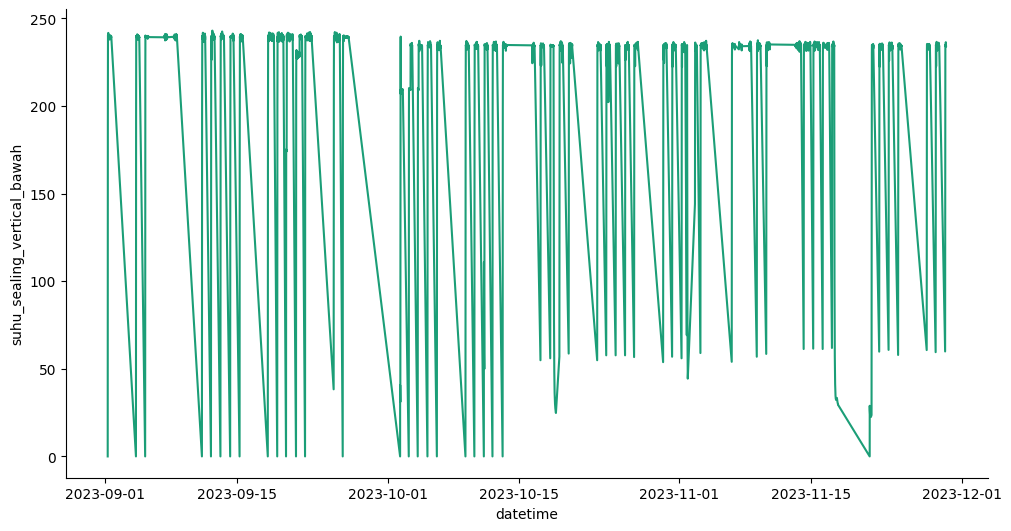

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_bawah')

**Suhu Sealing Vertical Atas**

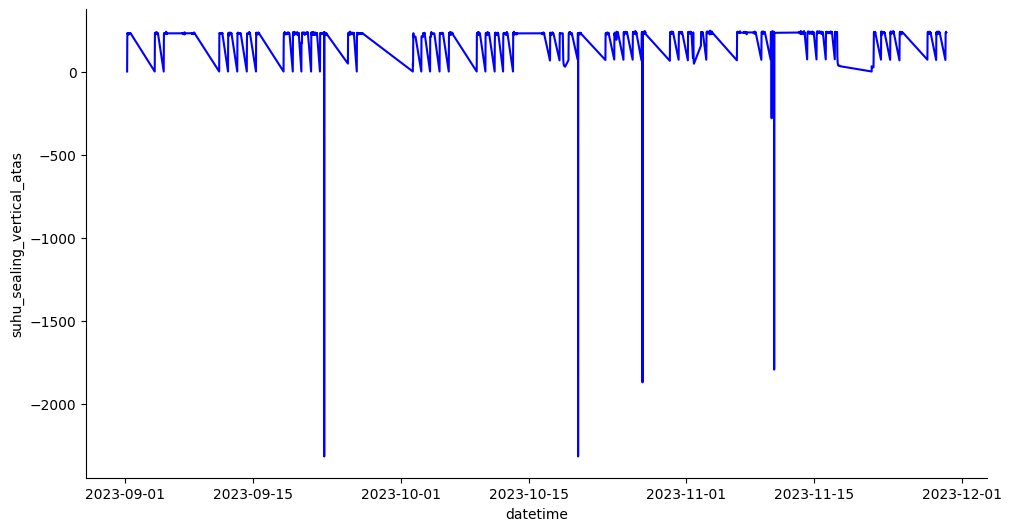

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['suhu_sealing_vertical_atas']

    plt.plot(xs, ys, label=series_name, color='blue')  # Change the color parameter to 'blue'

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Change layout='constrained' to constrained_layout=True
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_atas')

plt.show()

* Sumbu X: Sumbu X menunjukkan waktu, dalam satuan menit.
* Sumbu Y: Sumbu Y menunjukkan suhu, dalam satuan derajat Celcius.
* Garis: Garis pada grafik menunjukkan suhu sealing bawah pada interval 5 menit.
* Titik: Titik pada grafik menunjukkan nilai suhu sealing bawah pada interval 5 menit.

## Data Preprocessing

**Cek unique values**

In [ ]:
# Membuat fungsi unique_value() untuk mencetak nilai unik dari setiap kolom dalam dataframe
def unique_value():
    for i in df.columns:
        print(i, df[i].unique())
        print('\n')

# Memanggil fungsi unique_value() untuk mencetak nilai unik dari setiap kolom dalam dataframe
unique_value()

datetime ['2023-09-01T06:29:25.000000000' '2023-09-01T06:31:14.000000000'
 '2023-09-01T06:36:14.000000000' ... '2023-11-29T07:48:19.000000000'
 '2023-11-29T07:53:19.000000000' '2023-11-29T07:58:19.000000000']


suhu_sealing_vertical_bawah [  0.   43.1  91.5 132.3 164.  189.3 209.7 226.2 238.  240.3 239.9 238.5
 238.6 237.9 241.7 238.3 240.  239.3 239.4 239.6 239.1 239.2 239.5 239.
 240.2 239.7  46.4  94.2 135.  167.2 193.2 214.2 231.2 238.8 240.9 237.8
 240.5 238.7 240.1 238.4 239.8  64.4 111.6 148.4 177.6 201.2 220.1 234.6
 237.4 241.1 241.  240.8 238.1 240.4  29.5  77.3 118.4 150.1 175.1 195.2
 211.6 224.7 235.3 241.8 237.3 236.5 241.3  61.3 107.3 142.3 170.  192.1
 209.9 224.5 235.7 226.5 231.4 243.  237.7  32.6  81.1 121.2 152.1 177.1
 197.5 214.  227.4 236.9 241.4 242.5  23.7  66.3 110.  143.8 170.8 192.
 209.4 225.1 236.3 237.2 240.6  25.2  70.6 113.1 145.7 171.6 192.5 236.8
  26.4  73.4 115.  145.4 170.5 191.2 208.1 222.  233.  241.9 237.6 237.1
  47.2  94.3 131.  159.5 182.1 20

**Adjust outlier untuk Suhu Sealing Vertical Atas**

**Winsorization**

1. Tujuan:

    Proses winsorization bertujuan untuk menangani nilai outliers pada data dengan cara mengganti nilai-nilai ekstrim yang terlalu tinggi atau terlalu rendah dengan batas nilai atas (upper limit) dan batas nilai bawah (lower limit) yang telah ditentukan sebelumnya. Hal ini dilakukan untuk mengurangi dampak outliers terhadap analisis statistik data.

2. Fungsi:

    Fungsi winsorize() dari library pandas digunakan untuk menerapkan teknik winsorization pada data. Fungsi ini menerima parameter berupa:
      * Data series numeric yang akan diterapkan winsorization
      * Parameter limit bawah dan atas dalam bentuk desimal untuk menentukan batas nilai minimum dan maksimum. Dalam hal ini menggunakan 2.5% dan 97.5%.

3. Cara Kerja:
    
    Secara umum, fungsi winsorize() akan :
      * Mengurutkan data dari nilai terkecil hingga nilai terbesar
      * Mengidentifikasi nilai pada persentil batas bawah (2.5%) sebagai lower limit
      * Mengidentifikasi nilai pada persentil batas atas (97.5%) sebagai upper limit
      * Mengubah nilai di bawah lower limit menjadi nilai lower limit
      * Mengubah nilai di atas upper limit menjadi nilai upper limit
      * Mengembalikan series data numeric yang sudah terwinsorisi

reference : https://www.statology.org/winsorize/

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
df['suhu_sealing_vertical_atas'].quantile(0.025)

34.9

In [ ]:
df['suhu_sealing_vertical_atas'].quantile(0.975)

234.9

In [ ]:
df_winsorization = winsorize(df['suhu_sealing_vertical_atas'], (0.025, 0.025) )

In [ ]:
df_winsorization

masked_array(data=[ 34.9,  38.2,  91.6, ..., 234.2, 234.1, 234.3],
             mask=False,
       fill_value=1e+20)

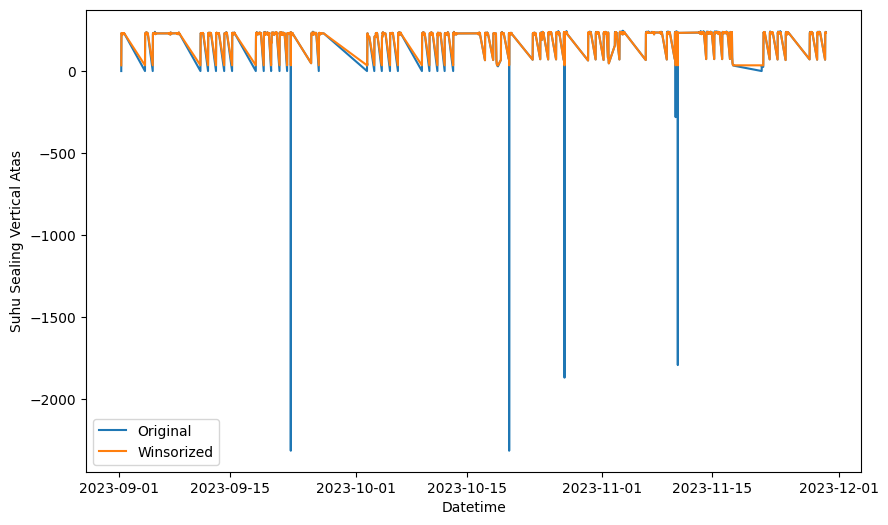

In [ ]:
# Make sure your DataFrame is sorted by datetime
df_adjustOutlier = df.sort_values('datetime')

# Applying winsorize to the 'suhu_sealing_vertical_atas' column
winsorized_values = winsorize(df_adjustOutlier['suhu_sealing_vertical_atas'], limits=(0.025, 0.025))

# Creating a new DataFrame with winsorized values
df_adjustOutlier = pd.DataFrame({'datetime': df_adjustOutlier['datetime'], 'suhu_sealing_vertical_atas': winsorized_values})

# Plotting the original and winsorized time series
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['suhu_sealing_vertical_atas'], label='Original')
plt.plot(df['datetime'], winsorized_values, label='Winsorized')
plt.xlabel('Datetime')
plt.ylabel('Suhu Sealing Vertical Atas')
plt.legend()
plt.show()

In [ ]:
df_adjustOutlier.head()

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,34.9
1,2023-09-01 06:31:14,38.2
2,2023-09-01 06:36:14,91.6
3,2023-09-01 06:41:14,129.5
4,2023-09-01 06:46:14,158.2


In [ ]:
df_adjustOutlier.describe().T

,count,mean,std,min,25%,50%,75%,max
suhu_sealing_vertical_atas,7622.0,219.372632,41.580801,34.9,229.2,229.4,234.2,234.9


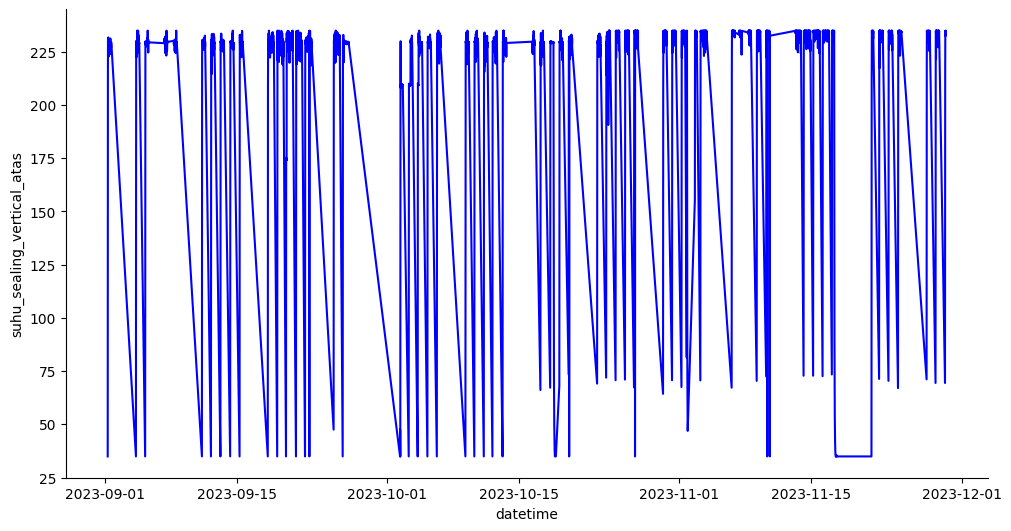

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['suhu_sealing_vertical_atas']

    plt.plot(xs, ys, label=series_name, color='blue')  # Change the color parameter to 'blue'

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Change layout='constrained' to constrained_layout=True
df_sorted = df_adjustOutlier.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_atas')

plt.show()

## Suhu Sealing Vertikal Bawah

In [ ]:
# Load data from Excel file

file_path = "/content/drive/MyDrive/Kalbe/data_mean187window_vbtemp.csv" #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

data = pd.read_csv(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

data.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,datetime,suhu_sealing_vertical_bawah
0,2023-09-01 06:29:25,209.7
1,2023-09-01 06:31:14,209.7
2,2023-09-01 06:36:14,209.7
3,2023-09-01 06:41:14,209.7
4,2023-09-01 06:46:14,209.7


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
print("Rows and Columns = ", data.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 2)


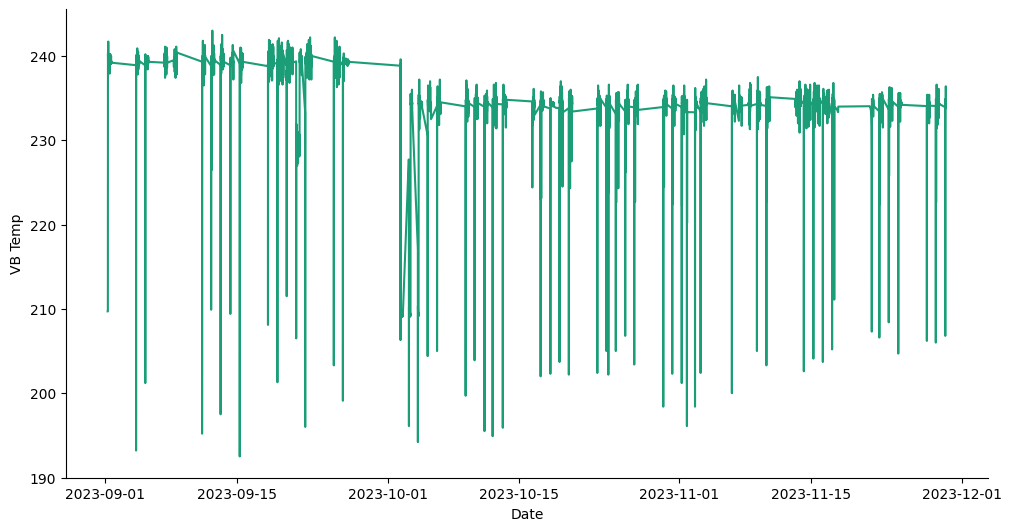

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

In [ ]:
# Separate data into training and validation sets
train_vbtemp = data.iloc[:7222]
test_vbtemp = data.iloc[7222:]

# Display information or dimensions of the training and validation sets
print("Number of training data:", len(train_vbtemp))
print("Number of testing data:", len(test_vbtemp))

Number of training data: 7222
Number of testing data: 400


In [ ]:
# Print validation data
train_vbtemp.head()
train_vbtemp.shape
print(train_vbtemp)

                datetime  suhu_sealing_vertical_bawah
0    2023-09-01 06:29:25                        209.7
1    2023-09-01 06:31:14                        209.7
2    2023-09-01 06:36:14                        209.7
3    2023-09-01 06:41:14                        209.7
4    2023-09-01 06:46:14                        209.7
...                  ...                          ...
7217 2023-11-23 09:56:58                        234.1
7218 2023-11-23 10:01:58                        234.3
7219 2023-11-23 10:06:58                        234.4
7220 2023-11-23 10:11:58                        234.4
7221 2023-11-23 10:16:58                        234.2

[7222 rows x 2 columns]


In [ ]:
test_vbtemp.head()
test_vbtemp.shape
print(test_vbtemp)

                datetime  suhu_sealing_vertical_bawah
7222 2023-11-23 10:21:58                        234.2
7223 2023-11-23 10:26:58                        234.4
7224 2023-11-23 10:31:58                        234.4
7225 2023-11-23 10:36:58                        234.1
7226 2023-11-23 10:41:58                        234.2
...                  ...                          ...
7617 2023-11-29 07:38:19                        233.9
7618 2023-11-29 07:43:19                        234.2
7619 2023-11-29 07:48:19                        234.5
7620 2023-11-29 07:53:19                        234.4
7621 2023-11-29 07:58:19                        234.4

[400 rows x 2 columns]


In [ ]:
from pmdarima import auto_arima

# The seasonal parameter is set to True to use SARIMA, otherwise it is just ARIMA
model = auto_arima(train_vbtemp['suhu_sealing_vertical_bawah'], seasonal=False, trace=True)

# Fit model with train_data
model.fit(train_vbtemp['suhu_sealing_vertical_bawah'])

# Perform predictions
forecast_validation = model.predict(n_periods=len(test_vbtemp))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=37226.467, Time=9.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38581.511, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38335.470, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38098.832, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38579.518, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=37228.129, Time=5.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=37225.520, Time=6.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=37254.989, Time=4.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=38026.629, Time=1.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=37225.706, Time=4.72 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=37755.816, Time=1.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=37227.173, Time=13.89 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=37223.576, Time=1.42 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=37253.036, Time=1.07 sec
 ARIMA(2,1,0)(0,0,

In [ ]:
# Rename columns for consistency with your friend's code
train_vbtemp = train_vbtemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})
test_vbtemp = test_vbtemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})

# Initialize ARIMA model with the best order (2, 1, 1). This order might change depending on your data.
model = ARIMA(train_vbtemp['y'], order=(2, 1, 1))

# Fit model with training data.
model_fit = model.fit()

# Get the number of forecast periods (size of the validation set).
number_of_forecast_periods = len(test_vbtemp)

# Forecast using the ARIMA model for the duration of the validation set.
forecast_validation = model_fit.forecast(steps=number_of_forecast_periods)

# Convert the forecast from array to dataframe and add ds (datestamp) column
forecast_validation_df = pd.DataFrame(forecast_validation, columns=['yhat'])
forecast_validation_df['ds'] = test_vbtemp['ds'].values

**Visualisasi Data antara Hasil Forecasting ARIMA dengan Data Validasi**

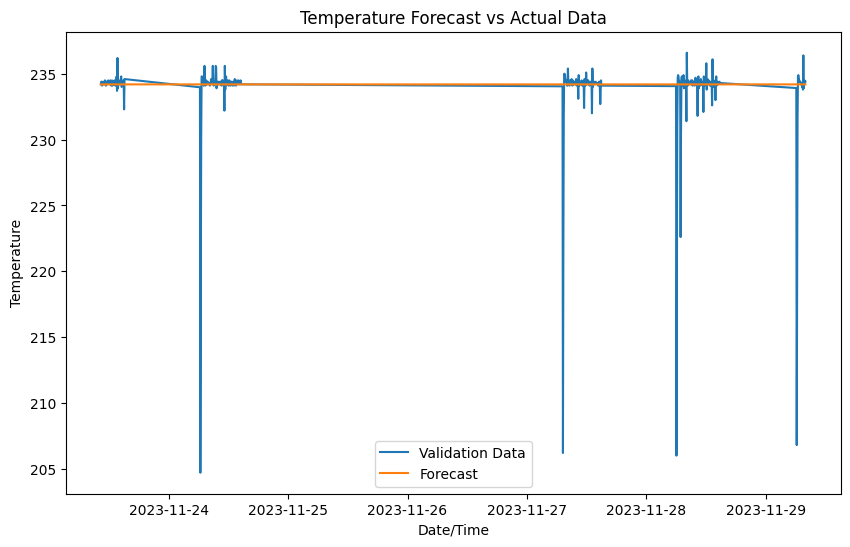

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_vbtemp['ds'], test_vbtemp['y'], label='Validation Data')
plt.plot(test_vbtemp['ds'], forecast_validation, label='Forecast')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Temperature Forecast vs Actual Data')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Convert validation_data['y'] and forecast to the same numpy array type
y_true = test_vbtemp['y'].values

# If forecast is already a numpy array, we can directly use it

mse = mean_squared_error(y_true, forecast_validation)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast_validation)
mape = np.mean(np.abs((forecast_validation - y_true) / y_true)) * 100

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Squared Error (MSE): 10.613841713746643
Root Mean Squared Error (RMSE): 3.2578891500090426
Mean Absolute Error (MAE): 0.7545982616415943
Mean Absolute Percentage Error (MAPE): 0.34334435235413036


##Forecast for Next 24 Hours

In [ ]:
model = ARIMA(endog=test_vbtemp['y'], order=(2, 1, 1))  # Pass 'y' as endogenous data
result = model.fit()  # Fit the model

# Generate predictions for the next 24 hours
forecast_horizon = 24 * 60  # 24 hours in minutes
future_df = pd.DataFrame({'ds': pd.date_range(start=test_vbtemp['ds'].iloc[-1], periods=forecast_horizon, freq='min')})  # Create a DataFrame for the future dates  # Create a DataFrame for the future dates
forecast_future = result.forecast(steps=forecast_horizon)  # Generate predictions

forecast_future.head()

7622    234.010876
7623    233.831975
7624    233.796032
7625    233.800797
7626    233.807266
Name: predicted_mean, dtype: float64

## Suhu Sealing Vertikal Atas

In [ ]:
# Load data from Excel file

file_path = "/content/drive/MyDrive/Kalbe/data_mean187window_vatemp.csv" #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

df2 = pd.read_csv(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

df2.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,198.8
1,2023-09-01 06:31:14,198.8
2,2023-09-01 06:36:14,198.8
3,2023-09-01 06:41:14,198.8
4,2023-09-01 06:46:14,198.8


In [ ]:
df2['datetime'] = pd.to_datetime(df2['datetime']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
print("Rows and Columns = ", df2.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 2)


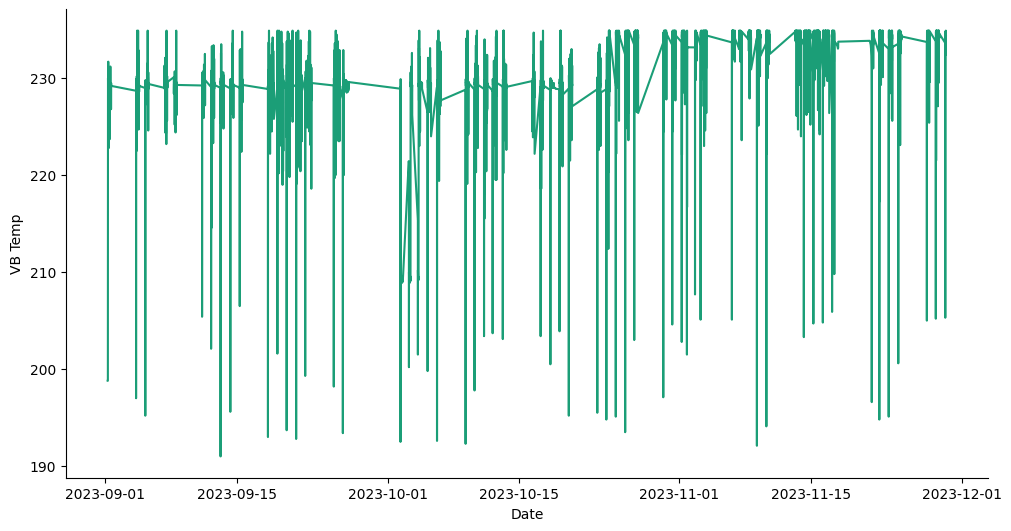

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_atas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

In [ ]:
# Separate data into training and validation sets
train_vatemp = df2.iloc[:7222]
test_vatemp = df2.iloc[7222:]

# Display information or dimensions of the training and validation sets
print("Jumlah data training:", len(train_vatemp ))
print("Jumlah data testing:", len(test_vatemp))

Jumlah data training: 7222
Jumlah data testing: 400


In [ ]:
from pmdarima import auto_arima

# Assuming train_atas and validation_atas are your train and test datasets
train = train_vatemp['suhu_sealing_vertical_atas']
test = test_vatemp['suhu_sealing_vertical_atas']

# Fit auto_arima function
model = auto_arima(train, start_p=1, start_q=1,
                   max_p=2, max_q=2, m=12,
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Print model summary
print(model.summary())

# Make predictions on test dataset
forecast = model.predict(n_periods=len(test))

# Create a comparison dataframe
compare_df = pd.DataFrame({'actual' : test, 'predicted': forecast})
print(compare_df)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=37602.625, Time=4.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39360.881, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38898.490, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38432.716, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39358.894, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=37600.390, Time=5.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=38592.264, Time=1.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=37600.715, Time=12.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=37600.829, Time=4.26 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=37598.658, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=37600.897, Time=1.58 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=38590.296, Time=0.73 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=37598.979, Time=4.80 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=38896.511, Time=0.19 sec
 ARIMA(1,1,2)(0,0,

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Rename columns for consistency
train_vatemp = train_vatemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_atas': 'y'})
test_vatemp = test_vatemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_atas': 'y'})

# Fit ARIMA model with training data
model = ARIMA(train_vatemp['y'], order=(2,1,1))
fit_model = model.fit()

# Forecast using the fitted ARIMA model
forecast = fit_model.forecast(steps=len(test_vatemp))

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({'ds': test_vatemp['ds'], 'y': forecast})

print(forecast_df)

                      ds           y
7222 2023-11-23 10:21:58  234.110601
7223 2023-11-23 10:26:58  234.019501
7224 2023-11-23 10:31:58  233.982205
7225 2023-11-23 10:36:58  233.967310
7226 2023-11-23 10:41:58  233.961385
...                  ...         ...
7617 2023-11-29 07:38:19  233.957478
7618 2023-11-29 07:43:19  233.957478
7619 2023-11-29 07:48:19  233.957478
7620 2023-11-29 07:53:19  233.957478
7621 2023-11-29 07:58:19  233.957478

[400 rows x 2 columns]


In [ ]:
# Create a DataFrame for the forecast results
forecast_test = fit_model.predict(start=test_vatemp.index.min(), end=test_vatemp.index.max(), typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


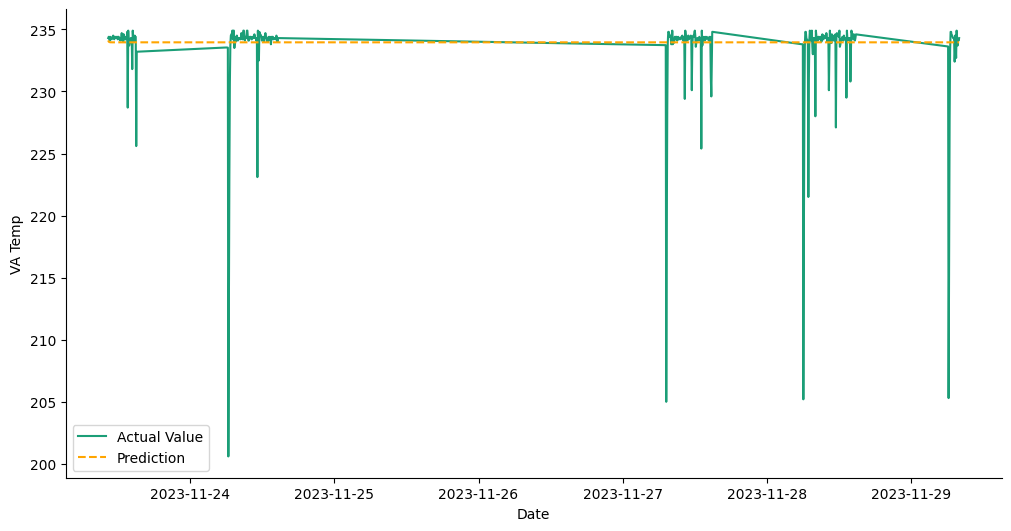

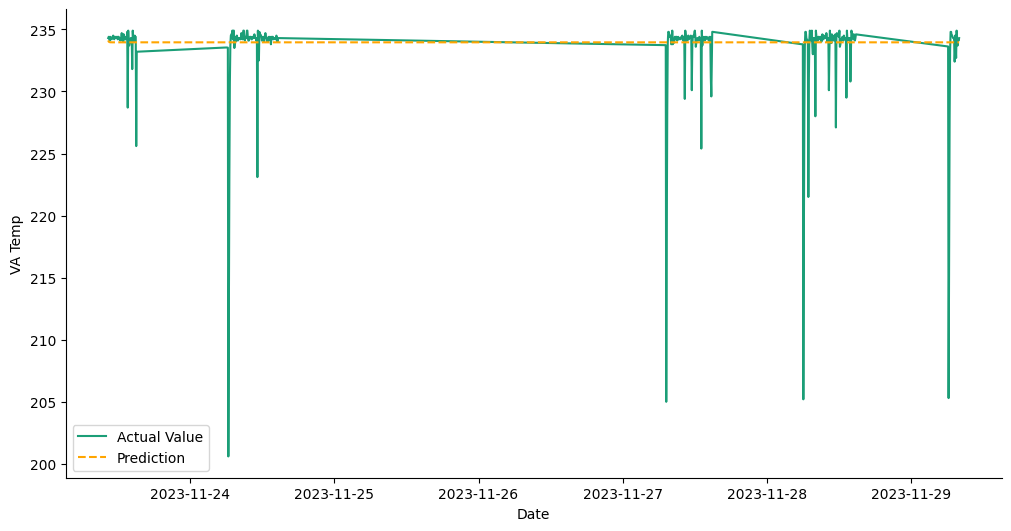

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['ds']
    ys = series['y']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Sort the data by 'Date'
df_sorted = test_vatemp.sort_values('ds', ascending=True)

# Plot the original series
_plot_series(df_sorted, 'Actual Value')

# Plot the forecast series
forecast_test.index = df_sorted.index  # Match the index for plotting
plt.plot(df_sorted['ds'], forecast_test, label='Prediction', linestyle='dashed', color='orange')

# Customize the plot
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('VA Temp')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(df_sorted['y'], forecast_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(df_sorted['y'], forecast_test)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Compute Mean Absolute Percentage Error (MAPE)
mape_val = np.mean(np.abs((df_sorted['y'] - forecast_test) / df_sorted['y'])) * 100

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape_val)

MAE: 1.1502888276945773
MSE: 14.410132373267976
RMSE: 3.796068014836928
MAPE: 0.5204105350758661
